In [16]:
import pandas as pd
import glob
from pathlib import Path
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from datetime import datetime

In [17]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 40)

In [18]:
df = pd.read_csv('/Users/ioneuk/Documents/flight-price-predictor/data/processed_dataset2.csv', parse_dates=['date_time', 'departure_date_time', 'arrival_date_time'])

In [19]:
df['measure_date'] = pd.to_datetime(pd.to_datetime(df['date_time']).dt.date)
df['departure_date'] = pd.to_datetime(pd.to_datetime(df['departure_date_time']).dt.date)
df['departure_hour'] = pd.to_datetime(df['departure_date_time']).dt.hour
df['departure_minute'] = pd.to_datetime(df['departure_date_time']).dt.minute
df['arrival_date'] = pd.to_datetime(pd.to_datetime(df['arrival_date_time']).dt.date)
df['arrival_hour'] = pd.to_datetime(df['arrival_date_time']).dt.hour
df['arrival_minute'] = pd.to_datetime(df['arrival_date_time']).dt.minute

In [20]:
df.dtypes

date_time                datetime64[ns]
departure_city                   object
departure_iata_code              object
arrival_city                     object
destination_iata_code            object
departure_date_time      datetime64[ns]
arrival_date_time        datetime64[ns]
flight_duration                   int64
carrier_name                     object
agent_name                       object
flight_number                     int64
price                           float64
prev_price_1                      int64
prev_price_2                      int64
prev_price_3                      int64
measure_date             datetime64[ns]
departure_date           datetime64[ns]
departure_hour                    int64
departure_minute                  int64
arrival_date             datetime64[ns]
arrival_hour                      int64
arrival_minute                    int64
dtype: object

In [21]:
df['measure_date'] = pd.to_datetime(pd.to_datetime(df['measure_date']).dt.date)
df['departure_date'] = pd.to_datetime(pd.to_datetime(df['departure_date']).dt.date)
df['arrival_date'] = pd.to_datetime(pd.to_datetime(df['arrival_date']).dt.date)

In [42]:
df.sort_values('departure_date', ascending=False).head(500)

,date_time,departure_city,departure_iata_code,arrival_city,destination_iata_code,departure_date_time,arrival_date_time,flight_duration,carrier_name,agent_name,flight_number,price,prev_price_1,prev_price_2,prev_price_3,measure_date,departure_date,departure_hour,departure_minute,arrival_date,arrival_hour,arrival_minute
5901,2020-03-04 16:12:39.213456,Warsaw,WAW,Barcelona,BCN,2020-04-01 15:45:00,2020-04-01 18:50:00,185,Wizz Air,Wizz Air,1475,765.99,747,923,801,2020-03-04,2020-04-01,15,45,2020-04-01,18,50
4171,2020-02-24 11:20:49.789038,Warsaw,WAW,Barcelona,BCN,2020-04-01 15:45:00,2020-04-01 18:50:00,185,Wizz Air,Wizz Air,1475,801.05,799,0,0,2020-02-24,2020-04-01,15,45,2020-04-01,18,50
5355,2020-03-01 14:58:52.305128,Warsaw,WAW,Barcelona,BCN,2020-04-01 15:45:00,2020-04-01 18:50:00,185,Wizz Air,Wizz Air,1475,747.79,923,801,799,2020-03-01,2020-04-01,15,45,2020-04-01,18,50
4712,2020-02-27 11:15:22.193216,Warsaw,WAW,Barcelona,BCN,2020-04-01 15:45:00,2020-04-01 18:50:00,185,Wizz Air,Wizz Air,1475,923.31,801,799,0,2020-02-27,2020-04-01,15,45,2020-04-01,18,50
7321,2020-03-13 17:04:04.200946,Warsaw,WAW,Barcelona,BCN,2020-04-01 15:45:00,2020-04-01 18:50:00,185,Wizz Air,Wizz Air,1475,725.41,729,719,765,2020-03-13,2020-04-01,15,45,2020-04-01,18,50
6540,2020-03-07 16:16:27.470961,Warsaw,WAW,Barcelona,BCN,2020-04-01 15:45:00,2020-04-01 18:50:00,185,Wizz Air,Wizz Air,1475,719.54,765,747,923,2020-03-07,2020-04-01,15,45,2020-04-01,18,50
7474,2020-03-16 17:23:16.156648,Warsaw,WAW,Barcelona,BCN,2020-04-01 15:45:00,2020-04-01 18:50:00,185,Wizz Air,Wizz Air,1475,590.83,725,729,719,2020-03-16,2020-04-01,15,45,2020-04-01,18,50
3462,2020-02-21 11:13:09.037955,Warsaw,WAW,Barcelona,BCN,2020-04-01 15:45:00,2020-04-01 18:50:00,185,Wizz Air,Wizz Air,1475,799.29,0,0,0,2020-02-21,2020-04-01,15,45,2020-04-01,18,50
6989,2020-03-10 16:21:07.782823,Warsaw,WAW,Barcelona,BCN,2020-04-01 15:45:00,2020-04-01 18:50:00,185,Wizz Air,Wizz Air,1475,729.32,719,765,747,2020-03-10,2020-04-01,15,45,2020-04-01,18,50
3220,2020-02-20 09:20:57.197737,Paris,BVA,Belgrade,BEG,2020-03-31 15:45:00,2020-03-31 18:05:00,140,Wizz Air,Wizz Air,4046,2088.19,0,0,0,2020-02-20,2020-03-31,15,45,2020-03-31,18,5


In [22]:
# df.agent_name.unique()

In [23]:
df.dtypes

date_time                datetime64[ns]
departure_city                   object
departure_iata_code              object
arrival_city                     object
destination_iata_code            object
departure_date_time      datetime64[ns]
arrival_date_time        datetime64[ns]
flight_duration                   int64
carrier_name                     object
agent_name                       object
flight_number                     int64
price                           float64
prev_price_1                      int64
prev_price_2                      int64
prev_price_3                      int64
measure_date             datetime64[ns]
departure_date           datetime64[ns]
departure_hour                    int64
departure_minute                  int64
arrival_date             datetime64[ns]
arrival_hour                      int64
arrival_minute                    int64
dtype: object

In [29]:
df.sort_values('measure_date').groupby(['departure_date','arrival_date','departure_city','arrival_city','flight_number','carrier_name']).size().nlargest(200)

departure_date  arrival_date  departure_city  arrival_city  flight_number  carrier_name         
2020-03-14      2020-03-14    Berlin          Amsterdam     4561           easyJet                  13
2020-03-15      2020-03-15    Paris           Belgrade      4046           Wizz Air                 13
2020-03-16      2020-03-16    Geneva          Budapest      1335           easyJet                  13
2020-03-17      2020-03-17    Prague          Amsterdam     7906           easyJet                  13
2020-03-09      2020-03-09    Warsaw          Barcelona     1475           Wizz Air                 12
2020-03-10      2020-03-10    Belgrade        Amsterdam     5592           transavia                12
2020-03-11      2020-03-11    Prague          Geneva        1322           easyJet                  12
2020-03-12      2020-03-12    Amsterdam       Edinburgh     6924           easyJet                  12
                              Berlin          Amsterdam     4561           easy

In [30]:
group_idx = df.sort_values('measure_date').groupby(['departure_date','arrival_date','departure_city','arrival_city','flight_number','carrier_name']).size().nlargest(100).index[0]

In [31]:
group_values = df.sort_values('measure_date').groupby(['departure_date','arrival_date','departure_city','arrival_city','flight_number','carrier_name']).get_group(group_idx)

In [32]:
group_values

,date_time,departure_city,departure_iata_code,arrival_city,destination_iata_code,departure_date_time,arrival_date_time,flight_duration,carrier_name,agent_name,flight_number,price,prev_price_1,prev_price_2,prev_price_3,measure_date,departure_date,departure_hour,departure_minute,arrival_date,arrival_hour,arrival_minute
101,2020-02-03 10:51:22.785049,Berlin,SXF,Amsterdam,AMS,2020-03-14 07:35:00,2020-03-14 09:15:00,100,easyJet,easyJet,4561,1110.76,0,0,0,2020-02-03,2020-03-14,7,35,2020-03-14,9,15
533,2020-02-06 08:27:26.434193,Berlin,SXF,Amsterdam,AMS,2020-03-14 07:35:00,2020-03-14 09:15:00,100,easyJet,easyJet,4561,797.30,1110,0,0,2020-02-06,2020-03-14,7,35,2020-03-14,9,15
1056,2020-02-09 08:24:22.601077,Berlin,SXF,Amsterdam,AMS,2020-03-14 07:35:00,2020-03-14 09:15:00,100,easyJet,easyJet,4561,959.09,797,1110,0,2020-02-09,2020-03-14,7,35,2020-03-14,9,15
1508,2020-02-12 08:13:13.722582,Berlin,SXF,Amsterdam,AMS,2020-03-14 07:35:00,2020-03-14 09:15:00,100,easyJet,easyJet,4561,969.97,959,797,1110,2020-02-12,2020-03-14,7,35,2020-03-14,9,15
2288,2020-02-15 08:24:10.307493,Berlin,SXF,Amsterdam,AMS,2020-03-14 07:35:00,2020-03-14 09:15:00,100,easyJet,easyJet,4561,408.19,969,959,797,2020-02-15,2020-03-14,7,35,2020-03-14,9,15
2971,2020-02-18 08:12:42.730918,Berlin,SXF,Amsterdam,AMS,2020-03-14 07:35:00,2020-03-14 09:15:00,100,easyJet,easyJet,4561,659.33,408,969,959,2020-02-18,2020-03-14,7,35,2020-03-14,9,15
3603,2020-02-21 08:18:18.230406,Berlin,SXF,Amsterdam,AMS,2020-03-14 07:35:00,2020-03-14 09:15:00,100,easyJet,easyJet,4561,523.73,659,408,969,2020-02-21,2020-03-14,7,35,2020-03-14,9,15
4165,2020-02-24 08:21:46.976837,Berlin,SXF,Amsterdam,AMS,2020-03-14 07:35:00,2020-03-14 09:15:00,100,easyJet,easyJet,4561,848.18,523,659,408,2020-02-24,2020-03-14,7,35,2020-03-14,9,15
4869,2020-02-27 08:13:21.552650,Berlin,SXF,Amsterdam,AMS,2020-03-14 07:35:00,2020-03-14 09:15:00,100,easyJet,easyJet,4561,757.27,848,523,659,2020-02-27,2020-03-14,7,35,2020-03-14,9,15
5490,2020-03-01 10:16:10.559988,Berlin,SXF,Amsterdam,AMS,2020-03-14 07:35:00,2020-03-14 09:15:00,100,easyJet,easyJet,4561,894.54,757,848,523,2020-03-01,2020-03-14,7,35,2020-03-14,9,15


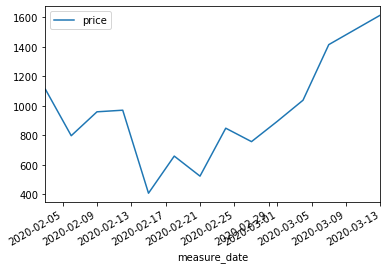

In [33]:
group_values.plot(x='measure_date', y='price')